<a href="https://colab.research.google.com/github/yuva23/Ds-python/blob/main/Renew_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib


In [2]:
# Generate synthetic data for demonstration purposes
np.random.seed(0)
n_samples = 1000
data = pd.DataFrame({
    'timestamp': pd.date_range('2021-01-01', periods=n_samples, freq='H'),
    'solar_radiation': np.random.rand(n_samples) * 1000,
    'wind_speed': np.random.rand(n_samples) * 20,
    'energy_consumption': np.random.rand(n_samples) * 500
})

# Feature Engineering: Add target variables for prediction
data['solar_generation'] = data['solar_radiation'] * 0.2  # Simplified formula
data['wind_generation'] = data['wind_speed'] * 0.3  # Simplified formula

# Calculate net energy (generation - consumption)
data['net_energy'] = data['solar_generation'] + data['wind_generation'] - data['energy_consumption']

# Define features and target variable
features = data[['solar_radiation', 'wind_speed', 'energy_consumption']]
target = data['net_energy']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=0)

Mean Absolute Error: 5.302598949225309
Mean Squared Error: 55.442887271086846
Root Mean Squared Error: 7.4459980708489875


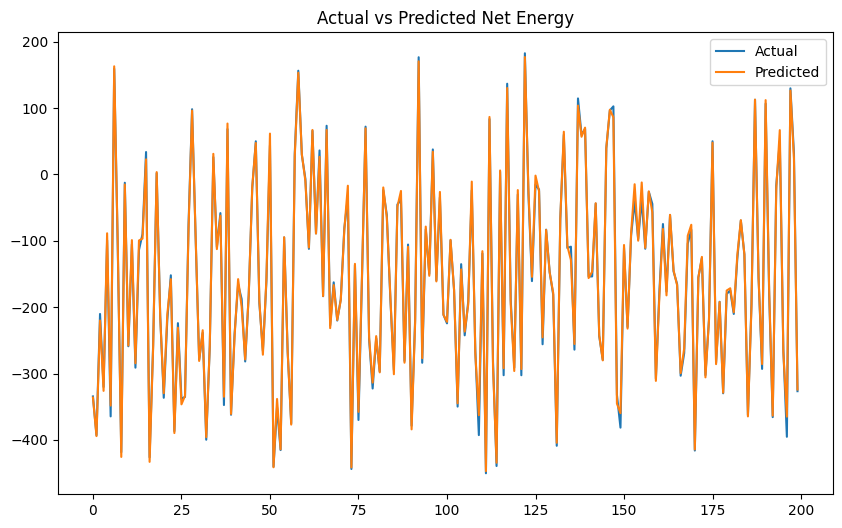

In [4]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Net Energy')
plt.show()


In [5]:
# Save the trained model and scaler for later use
joblib.dump(model, 'energy_optimization_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [6]:
# Load the saved model and scaler
model = joblib.load('energy_optimization_model.pkl')
scaler = joblib.load('scaler.pkl')

# Example new data for prediction
new_data = pd.DataFrame({
    'solar_radiation': [800, 950],
    'wind_speed': [10, 15],
    'energy_consumption': [300, 450]
})

# Preprocess the new data
new_data_scaled = scaler.transform(new_data)

# Predict net energy for the new data
new_predictions = model.predict(new_data_scaled)
print(f'Predicted Net Energy: {new_predictions}')


Predicted Net Energy: [-132.75368107 -266.62354749]
